In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing 


In [2]:

# Read the Dataset
#dataset = datasets.load_iris()
dataset = pd.read_csv("./datasets/iris.csv")
# label_encoder = preprocessing.LabelEncoder()
# dataset["species"]= label_encoder.fit_transform(dataset["species"]) # Encoding Output Variable


In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
label_encoder = preprocessing.LabelEncoder()
dataset["species"]= label_encoder.fit_transform(dataset["species"]) # Encoding Output Variable


In [7]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
X = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = dataset["species"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [63]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)
neigh = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree") # algorithm="ball_tree"
clf = neigh.fit(X_train, y_train)
print("The accuracy on test set is {0:.2f}".format(clf.score(X_test, y_test)))

The accuracy on test set is 0.98


In [18]:
# From Scratch

In [20]:
import numpy as np

In [21]:
def euclidean_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [22]:
euclidean_distance(np.array([5,5]),np.array([2,2]))

4.242640687119285

In [23]:
from collections import Counter

In [65]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X,y):
        self.X_train = X
        self.y_train = y
    
    # caculating distance between testing data to all train data
    def predict(self, X):
        predictions = [self.predict_helper(x) for x in X]
        return predictions
    
    # Calculate one single datapoint 
    def predict_helper(self, x):
        
        # compute distances
        
        distances = []
        
        for x_train in self.X_train:
            distances.append(euclidean_distance(x,x_train))
        
        # get closest k
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        print(most_common)
        return most_common[0][0]
        

In [66]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


In [67]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, train_size=0.2)


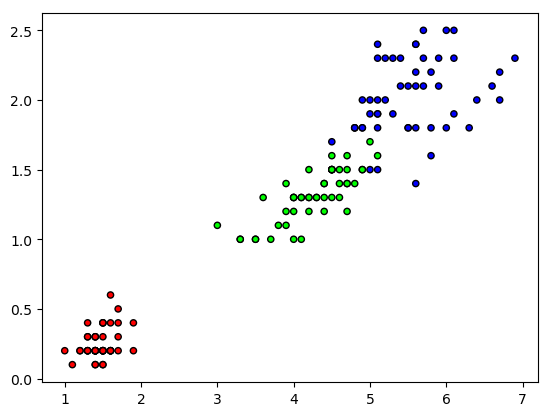

In [70]:
plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [71]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(2, 5)]
[(0, 5)]
[(1, 4), (2, 1)]
[(0, 5)]
[(0, 5)]
[(0, 5)]
[(1, 4), (2, 1)]
[(2, 5)]
[(1, 5)]
[(0, 5)]
[(2, 5)]
[(1, 4), (2, 1)]
[(0, 5)]
[(1, 5)]
[(2, 5)]
[(0, 5)]
[(2, 5)]
[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(2, 5)]
[(0, 5)]
[(2, 3), (1, 2)]
[(1, 5)]
[(2, 5)]
[(0, 5)]
[(1, 3), (0, 2)]
[(1, 3), (2, 2)]
[(0, 5)]
[(2, 3), (1, 2)]
[(2, 3), (1, 2)]
[(0, 5)]
[(0, 5)]
[(0, 5)]
[(0, 5)]
[(1, 3), (0, 2)]
[(0, 5)]
[(1, 4), (2, 1)]
[(0, 5)]
[(2, 5)]
[(2, 5)]
[(0, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(0, 5)]
[(2, 5)]
[(2, 5)]
[(1, 4), (2, 1)]
[(1, 3), (0, 2)]
[(1, 5)]
[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(0, 5)]
[(0, 5)]
[(2, 5)]
[(2, 4), (1, 1)]
[(2, 5)]
[(0, 5)]
[(0, 5)]
[(0, 5)]
[(2, 4), (1, 1)]
[(1, 5)]
[(2, 4), (1, 1)]
[(2, 5)]
[(1, 4), (2, 1)]
[(0, 5)]
[(2, 5)]
[(0, 5)]
[(2, 5)]
[(0, 5)]
[(1, 4), (2, 1)]
[(1, 4), (2, 1)]
[(0, 5)]
[(1, 5)]
[(0, 5)]
[(2, 5)]
[(2, 5)]
[(2, 3), (1, 2)]
[(1

In [57]:
print(predictions)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 0, 1]


In [58]:
acc = np.sum(predictions==y_test)/len(y_test)

In [59]:
acc

0.9583333333333334